In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load the data set
claimants = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants.shape

(1340, 7)

In [ ]:
len(claimants['CASENUM'].unique())

1283

In [ ]:
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [ ]:
#Shape of the data set
claimants.shape

(1340, 6)

In [ ]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)


LogisticRegression()

In [ ]:
#Predict for X dataset

y_pred = classifier.predict(X)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [ ]:
#ROC Curve

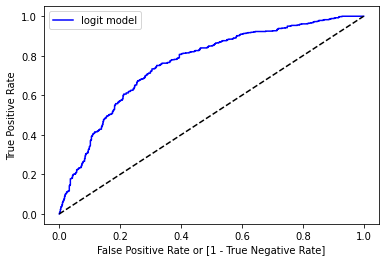

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='Blue', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
auc

0.7108589063606365